# Redes Neuronales - °C a °F

$$°F = 1.8 * °C + 32$$

## Importar Librerías

TensorFlow es una biblioteca de Python para computación numérica rápida, creada y lanzada por Google

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
celsius = np.array([-40, -20, -10, 0, 10, 15, 20, 25, 30, 35], dtype=float)
fahrenheit = np.array([-40, -4, 14, 32, 50, 59, 68, 77, 86, 95], dtype=float)

## Crear modelo de RED NEURONAL

Las capas densas son las que tienen conexiones de todas las neuronas a todas las demás. Las units son unidades o neuronas de la capa de salida. Las input_shpae son unidades o neuronas de la capa de entrada.

In [3]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

## Compilar el modelo

El modelo ADAM permite ajustar pesos y sesgos de manera eficiente de manera progresiva para que vaya mejorando. El parámetro del modelo Adam es la taza de aprendizaje. Loss es la función de pérdida.

In [4]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

## Entrenar el modelo

epochs = vueltas que dará la red (a prueba y error)
verbose = False para no imprimir demasiada información

In [5]:
data_train = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=True)
print('Modelo entrenado')

Epoch 1/1000
1/1 [==============================] - 1s 654ms/step - loss: 1301.4556
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 1211.2360
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 1132.8363
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 1066.3561
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 1011.7245
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 968.6420
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 936.5200
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 914.4240
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 901.0400
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 894.6906
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 893.4207
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 895.1627
Epoch 13/1000
1/

## Imprimir función de perdida

Permite saber qué tan mal se encuentra en cada vuelta que dió

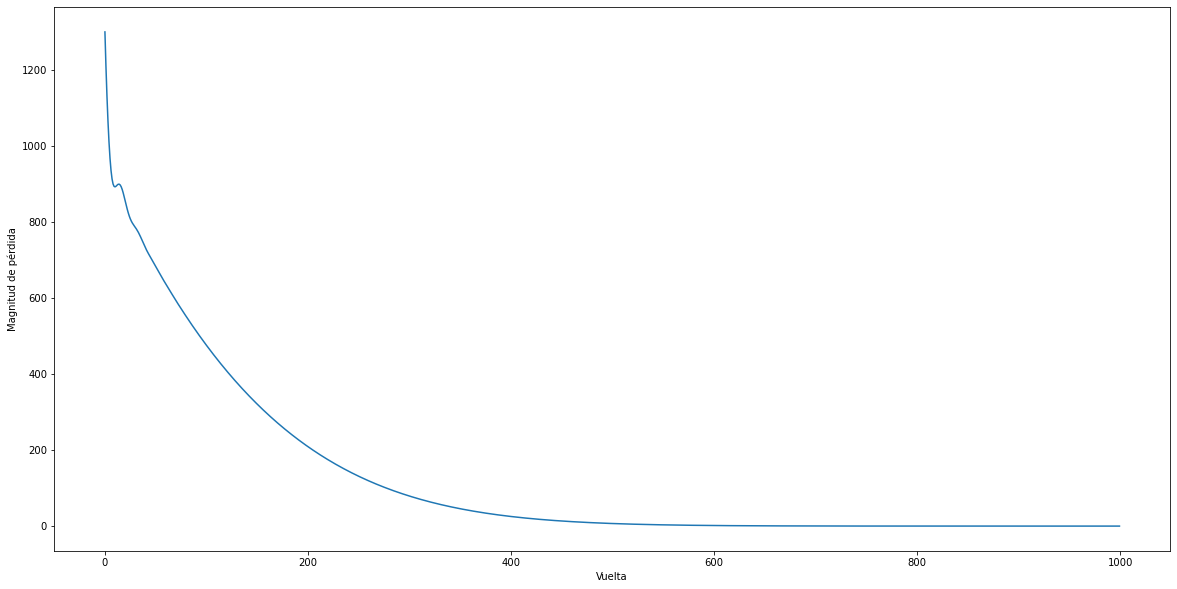

In [6]:
import matplotlib.pyplot as plt

def perdida():
    fig, ax = plt.subplots(figsize = (20, 10))

    plt.xlabel('Vuelta')
    plt.ylabel('Magnitud de pérdida')
    plt.plot(data_train.history['loss'])

perdida()

Se aprecia qu la pérdida de datos disminuye en cada vuelta, es decir que va mejorando y se estabiliza a partir de las 350 vueltas aproximadamente.

## Predecir

In [7]:
def predecir():
    print(''.ljust(20, '-'), end='Predicciones'.ljust(30, '-'))
    y_pred = modelo.predict([100])
    print(f'El resultado es {y_pred} °F')

predecir()

--------------------Predicciones------------------El resultado es [[212.00395]] °F


Se predice el resultado con una entrada de $100°C$. Este valor no está en los datos de entrenamiento. El modelo obtuvo el valor de $212.000601$. Al contrastar con un conversor o aplicando la fórmula, se tiene que $100°C$ equivalen a $212°F$, lo cual demuestra que el modelo funciona muy bien y proporciona predicciones muy aproximadas.

In [8]:
print('Peso y sesgo: ', capa.get_weights())

Peso y sesgo:  [array([[1.8002716]], dtype=float32), array([31.976791], dtype=float32)]


Acá se obtiene que el valor del peso es $1.8003926$, y el sesgo es de $31.920828$. Si comparamos esta información con la fórmula de conversión, apreciamos que tienen mucho en común:

$$ °F = 1.8 * °C + 32 $$

Esta fórmula la predijo el modelo, aprendiendo con el entrenamiento.

## Experimentar con más capas y más neuronas

In [9]:
oculta1 = tf.keras.layers.Dense(units = 4, input_shape = [1])
oculta2 = tf.keras.layers.Dense(units = 4)
salida = tf.keras.layers.Dense(units = 1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [10]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

En este caso agreagmos 2 capas ocultas (intermedias) con 4 neuronas cada una.

In [11]:
data_train = modelo.fit(celsius, fahrenheit, epochs=500, verbose=True)
print('Modelo Entrenado')

Epoch 1/500
1/1 [==============================] - 0s 331ms/step - loss: 3100.2744
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 1934.9636
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1036.1233
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 994.8133
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 1424.8745
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1187.3347
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 849.0884
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 736.5640
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 796.0170
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 881.4396
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 909.2492
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 863.4803
Epoch 13/500
1/1 [============

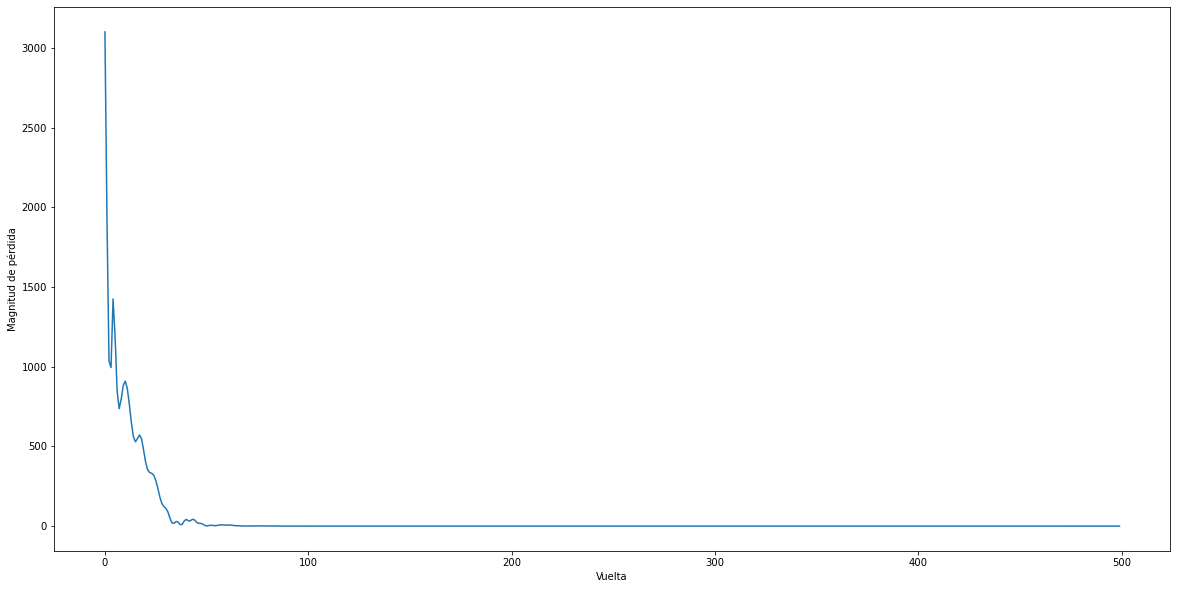

In [12]:
perdida()

En este caso se aprecia que la pérdida se estabilizo antes de las 100 vueltas. Esto indica que con más capas se logra una mejor eficiencia más rápido.

In [13]:
predecir()

--------------------Predicciones------------------El resultado es [[211.99998]] °F


In [15]:
print('Peso y sesgo: ', salida.get_weights())

Peso y sesgo:  [array([[ 0.73180026],
       [ 0.47392893],
       [-1.1274729 ],
       [ 0.20566532]], dtype=float32), array([3.4071722], dtype=float32)]


En este caso los valores que se obtienen de peso (4 neuronas) y sesgo no son tán faciles de entender. Pero por la predicción podemos entender que fue un buen modelo.